In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#import warnings warnings.filterwarnings("ignore")

In [ ]:
#linking the dataset in google grive to the google colab ipynb file
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


 Overall, the data captures people’s basic characteristics via 17 variables about their
background, whether they received job training from NSWP (treatment), and their employment status (outcome). Information about whether a sample comes from experimental or observational data is
recorded under column ‘e’, though all records should be used for modelling.

In [ ]:
#reading the dataset
data1 = pd.read_csv("/content/gdrive/MyDrive/Dataset/jobs.csv")
data1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0


1. Load, clean, and explore the datasets provided (IHDP and JOBS), which are described in Section 4.
• Can you identify the causal questions for each dataset?
2. Select appropriate evaluation metrics for each dataset. Justify your choices. Things to consider:
• Granularity of predictions and measured errors (average vs. individual).
• Whether the dataset includes counterfactual outcomes (or true individual effects).
3. Simple learners
(a) Choose at least one regression model that provides feature importances. Examples: linear
regression, decision tree, random forest, boosted trees.
• Taking into account the model and the dataset, preprocess the data if needed.
• In your report, make sure that you justify your choice of regressor. All models have
strengths and weaknesses — what makes the one you chose more appealing?
5. Advanced CATE estimators
(a) Choose at least one CATE estimator from EconML package (https://econml.azurewebsites.
net/reference.html#cate-estimators). Comment on your choice(s)

In [ ]:
#observing the shape and size of the dataset -  the dataset have 3212 rows and 20 columns
data1.shape

(3212, 20)

In [ ]:
data1.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
count,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000
mean,2.382901e-16,-3.820971e-16,0.374222,0.048879,0.707970,0.411893,-1.200783e-16,4.956600e-17,-6.083414e-18,1.757408e-14,-2.638422e-16,-1.168292e-17,9.429291e-17,0.168742,0.167497,1.901758e-16,0.010897,0.092466,0.849938,0.224782
std,1.000000e+00,1.000000e+00,0.483997,0.215649,0.454767,0.492253,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.374582,0.373477,1.000000e+00,0.103833,0.289727,0.357188,0.417504
min,-1.461095e+00,-3.986840e+00,0.000000,0.000000,0.000000,0.000000,-1.147411e+00,-1.110467e+00,-1.164047e+00,-9.488316e-01,-2.143974e+00,-5.580568e-01,-5.188151e-01,0.000000,0.000000,-9.799811e-01,0.000000,0.000000,0.000000,0.000000
25%,-8.024627e-01,-5.796108e-01,0.000000,0.000000,0.000000,0.000000,-8.923385e-01,-9.139141e-01,-7.852843e-01,-7.434072e-01,-6.707297e-01,-5.423814e-01,-5.098380e-01,0.000000,0.000000,-8.142367e-01,0.000000,0.000000,1.000000,0.000000
50%,-3.320111e-01,1.018350e-01,0.000000,0.000000,1.000000,0.000000,-8.521244e-02,-8.346011e-02,-4.355556e-01,-4.998533e-01,-2.250229e-02,-2.862214e-01,-2.737369e-01,0.000000,0.000000,-2.035020e-01,0.000000,0.000000,1.000000,0.000000
75%,7.970728e-01,4.425579e-01,1.000000,0.000000,1.000000,1.000000,5.506613e-01,5.629081e-01,6.730184e-01,5.267384e-01,3.458087e-01,1.366588e-01,1.318304e-01,0.000000,0.000000,4.539777e-01,0.000000,0.000000,1.000000,0.000000
max,2.114337e+00,1.805449e+00,1.000000,1.000000,1.000000,1.000000,8.751987e+00,1.016507e+01,2.446737e+00,2.773336e+00,2.113702e+00,2.305284e+01,2.902264e+01,1.000000,1.000000,7.136030e+00,1.000000,1.000000,1.000000,1.000000


In [ ]:
data1.info()
#it has been observed that the data contains no null values in any column and all the variable belong to float64 type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3212 non-null   float64
 1   x2      3212 non-null   float64
 2   x3      3212 non-null   float64
 3   x4      3212 non-null   float64
 4   x5      3212 non-null   float64
 5   x6      3212 non-null   float64
 6   x7      3212 non-null   float64
 7   x8      3212 non-null   float64
 8   x9      3212 non-null   float64
 9   x10     3212 non-null   float64
 10  x11     3212 non-null   float64
 11  x12     3212 non-null   float64
 12  x13     3212 non-null   float64
 13  x14     3212 non-null   float64
 14  x15     3212 non-null   float64
 15  x16     3212 non-null   float64
 16  x17     3212 non-null   float64
 17  t       3212 non-null   float64
 18  y       3212 non-null   float64
 19  e       3212 non-null   float64
dtypes: float64(20)
memory usage: 502.0 KB


In [ ]:
# as is seen above, all the columns have data type float64. but for exploring and analysis, the numeric values should be in integer form
data2 = data1.astype(int)

In [ ]:
#as given in the data description, x1-x17 contains all the basic attributes (x), the outcomes of the observed data in x1-x17 columns is given in "e" column


#so, doing univariate analysis
#UNIVARIATE ANALYSIS of columns in dataframe -  data2 (to get the idea of the range of each column values)

for i in data2.columns:
  print("The unique values in", i, "are:", data2[i].unique(),"\n")

The unique values in x1 are: [ 0 -1  1  2] 

The unique values in x2 are: [ 1  0 -1 -2 -3] 

The unique values in x3 are: [0 1] 

The unique values in x4 are: [0 1] 

The unique values in x5 are: [1 0] 

The unique values in x6 are: [0 1] 

The unique values in x7 are: [ 2  0 -1  1  3  5  4  6  8] 

The unique values in x8 are: [ 2  0  1 -1  3  5  4 10] 

The unique values in x9 are: [ 0 -1  1  2] 

The unique values in x10 are: [0 1 2] 

The unique values in x11 are: [ 1  0 -1  2 -2] 

The unique values in x12 are: [ 2  0  1  3  5  9  4  6  7 10 13 23 11] 

The unique values in x13 are: [ 2  0  1  3  4  5 11  6  9 29  8] 

The unique values in x14 are: [0 1] 

The unique values in x15 are: [0 1] 

The unique values in x16 are: [2 0 1 3 4 6 5 7] 

The unique values in x17 are: [0 1] 

The unique values in t are: [0 1] 

The unique values in y are: [1 0] 

The unique values in e are: [0 1] 



In [ ]:
X=data1
X=X.drop('e', axis=1)

In [ ]:
Y=data1['e']

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

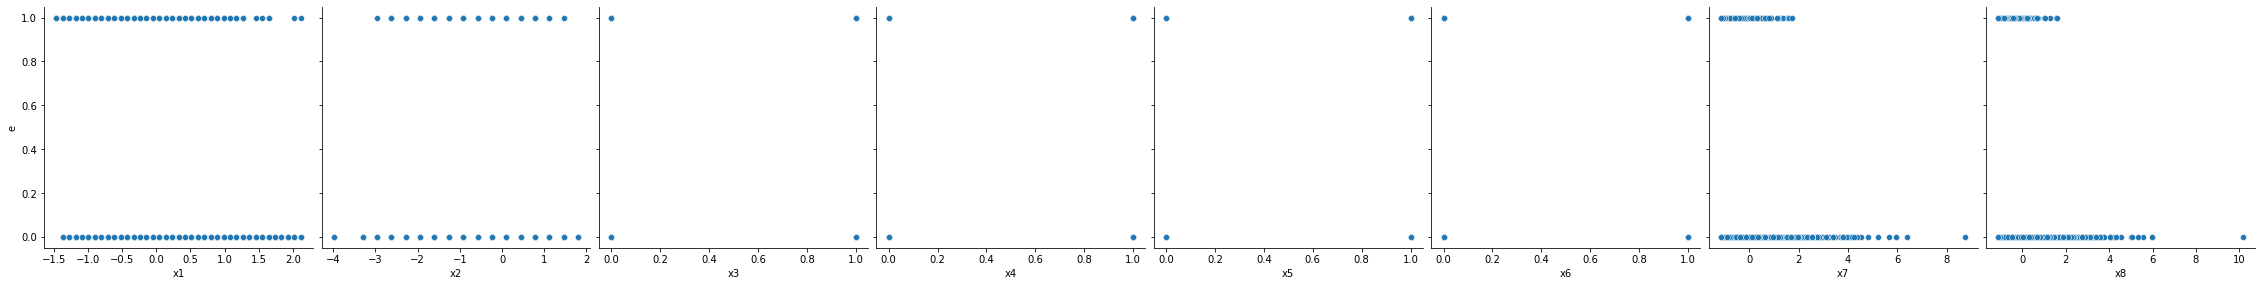

In [ ]:
sns.pairplot(data1, x_vars=['x1', 'x2', 'x3','x4','x5', 'x6', 'x7','x8'], y_vars='e',size=4, aspect=1, kind='scatter')
plt.show()

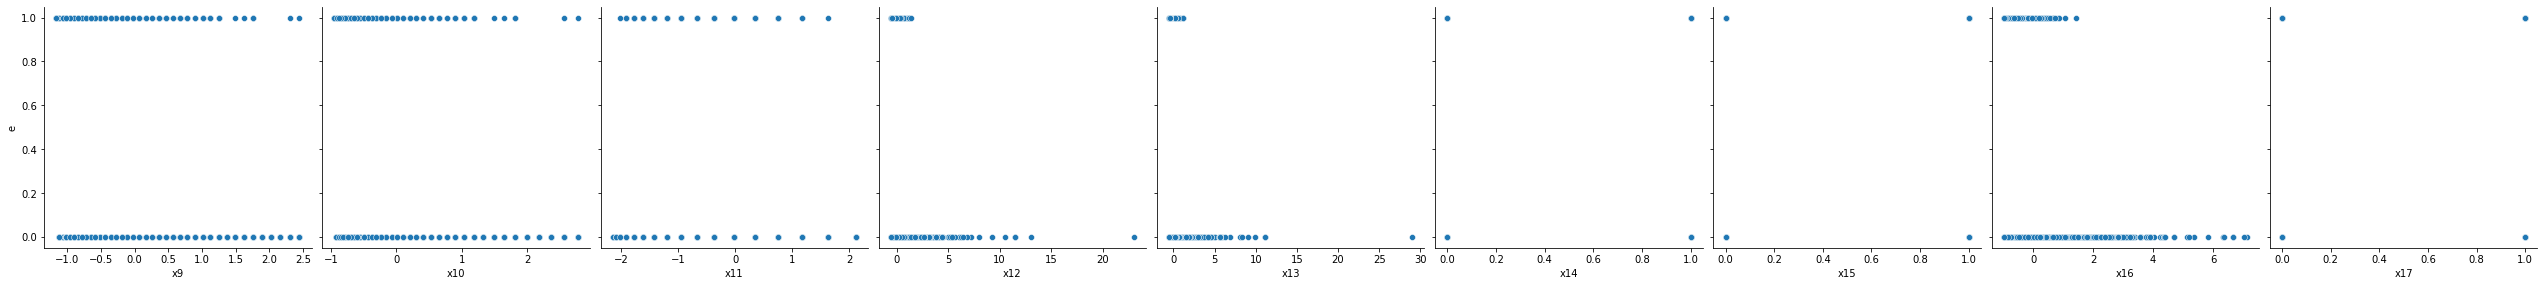

In [ ]:
sns.pairplot(data1, x_vars=['x9', 'x10', 'x11','x12', 'x13','x14','x15','x16','x17'], y_vars='e',size=4, aspect=1, kind='scatter')
plt.show()

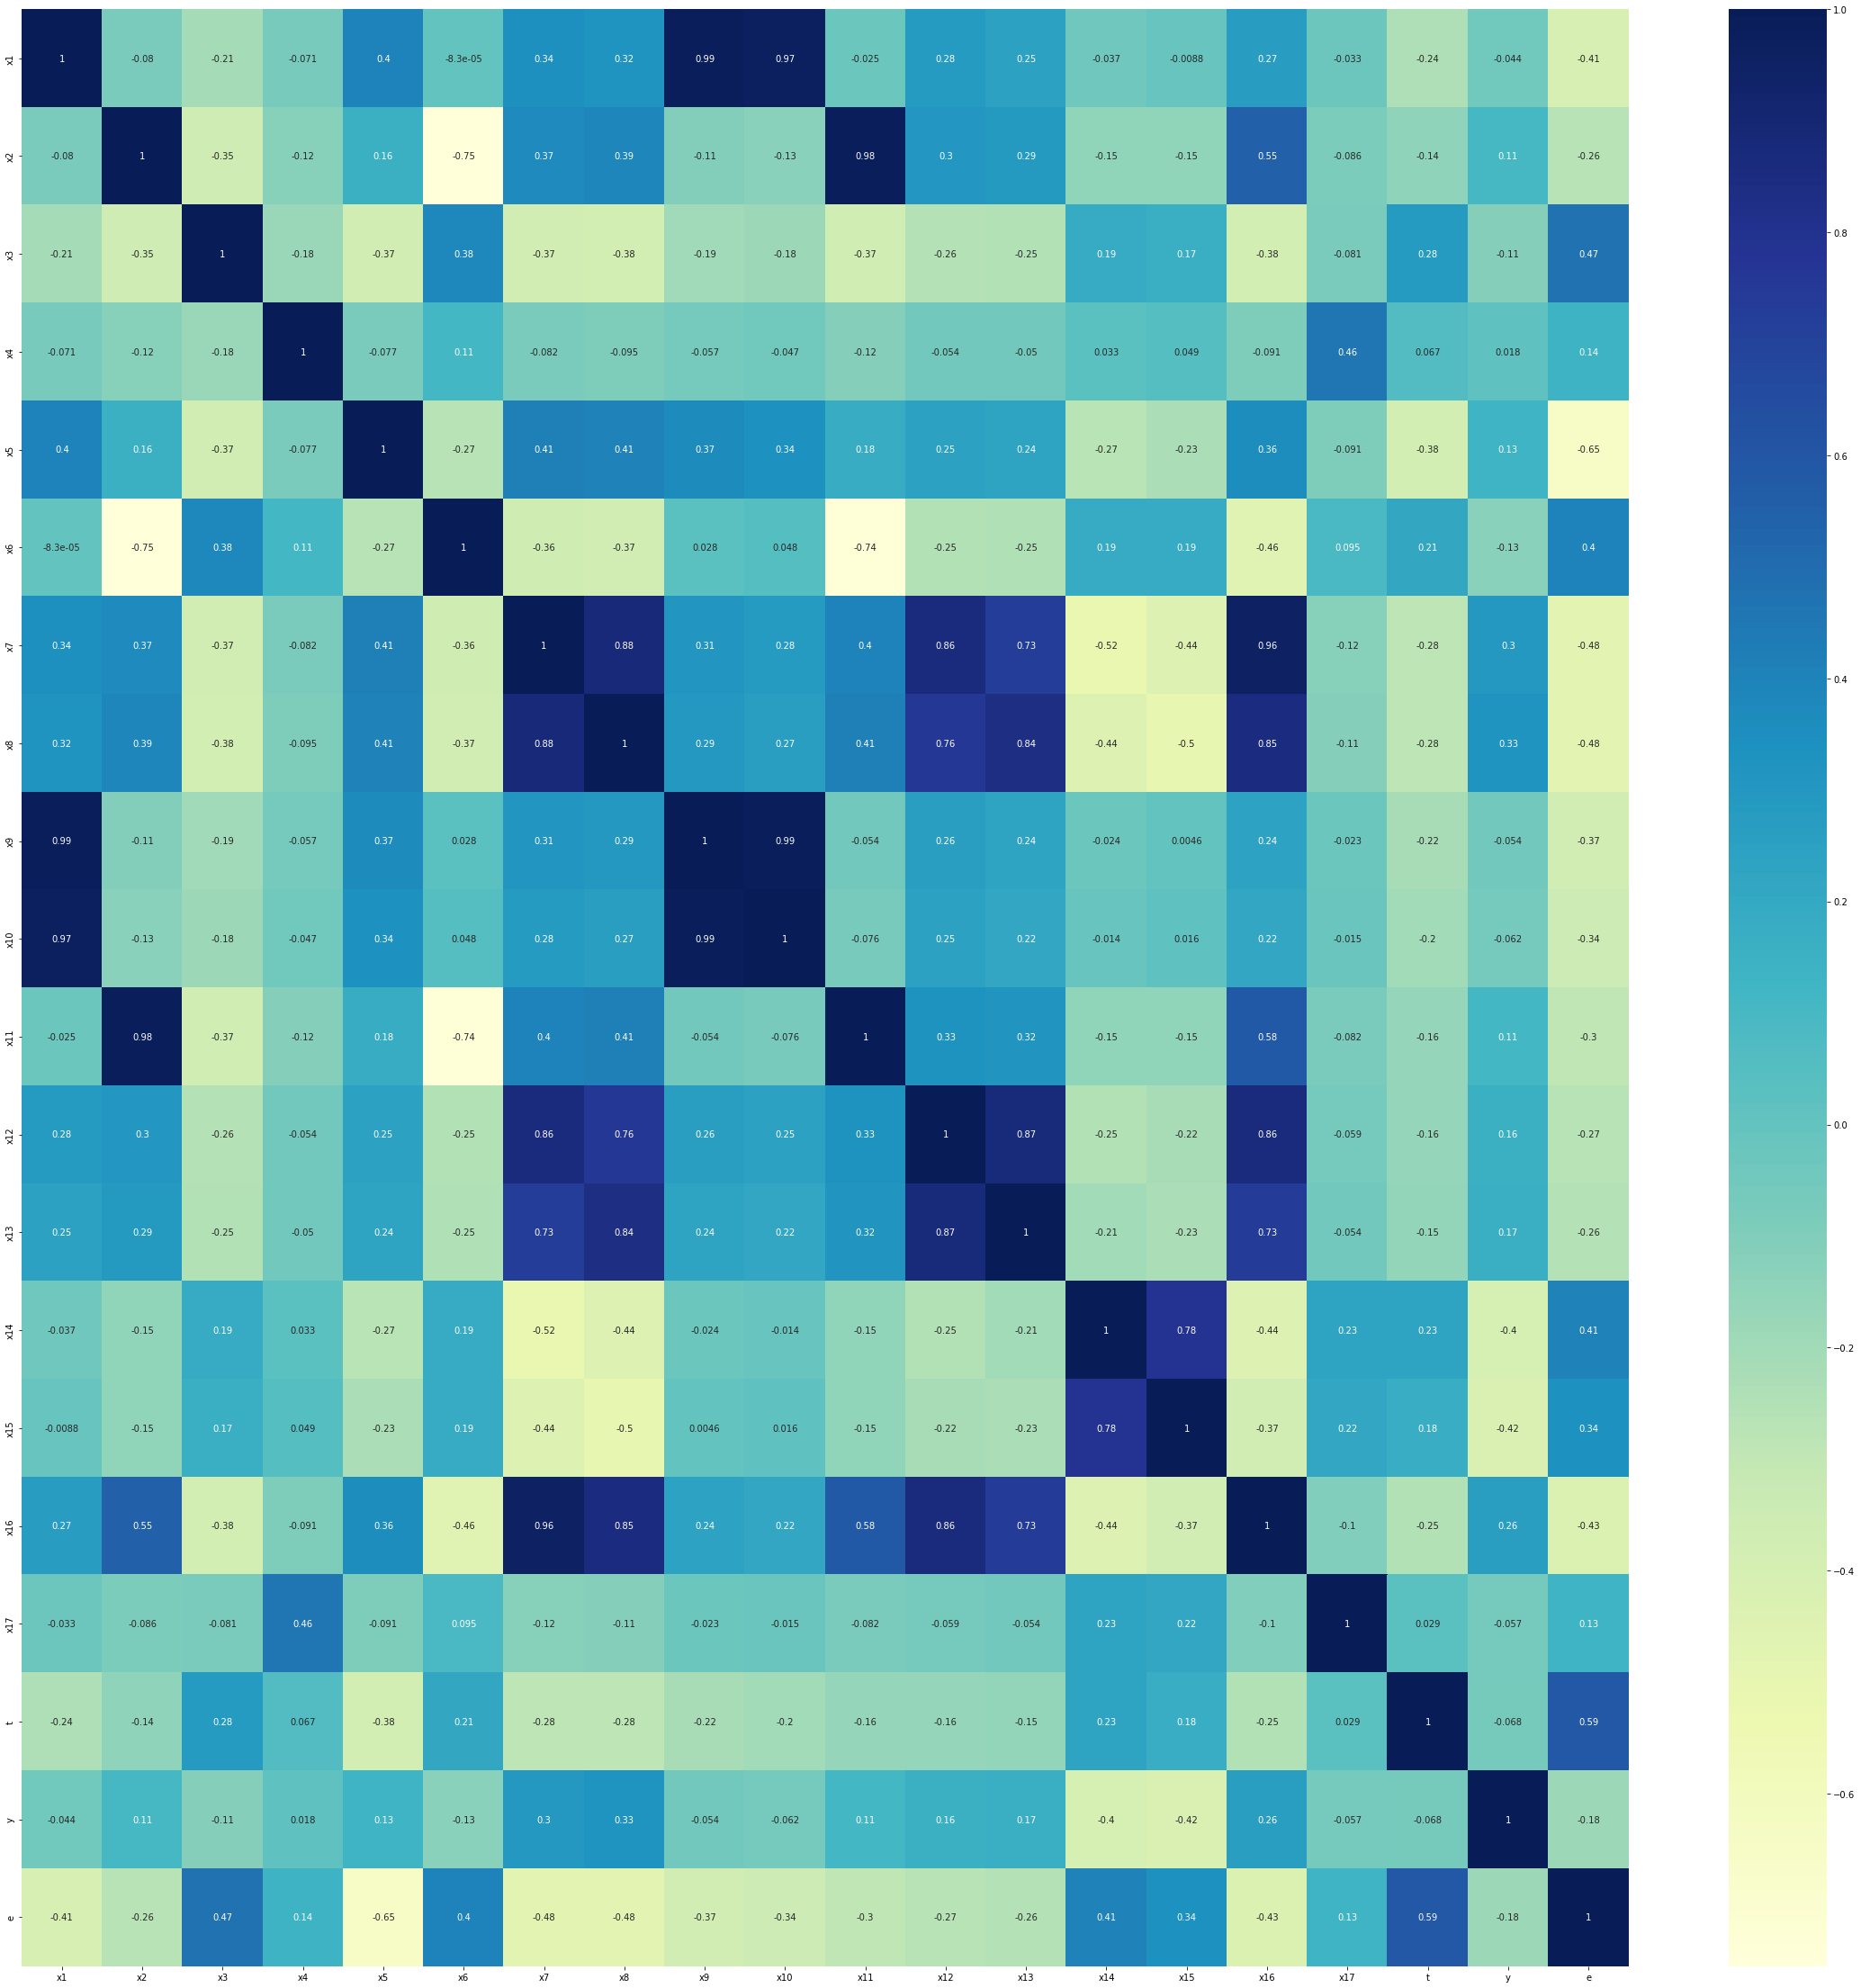

In [ ]:

plt.figure(figsize = (40, 40))
sns.heatmap(data1.corr(), annot = True, cmap="YlGnBu")
plt.show()

Casual Questions for the dataset

1. what independent variables are strongly co-related with the target variable?
2. what variables should be considered for making a regression model? Shall all of the given independent variables (x1-x17,t,y) contribute in the prediction of target variable "e"?
3. If all of them do not contribute in the prediction, how to find out the necessary variables to be considered for making the regression model?
4. Out of the variables effecting the target variable, how to find out the most effecting variable, so that it can be added into the ML model first?

Choice of regression Model & Evaluation Parameters
 
The model in choice here is Multiple Linear Regression, In which the independent variables are added to the Model one by one

In [ ]:
### Dividing into X and Y sets for the model building

y_train = data1.pop('e')
X_train = data1

In [ ]:
## Step 5: Building a linear model


import statsmodels.api as sm

In [ ]:

# Add a constant - because T had highest corelation with the target variable
X_train_lm = sm.add_constant(X_train[['t']])


In [ ]:

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
# Check the parameters obtained

lr.params

const    0.145798
t        0.854202
dtype: float64

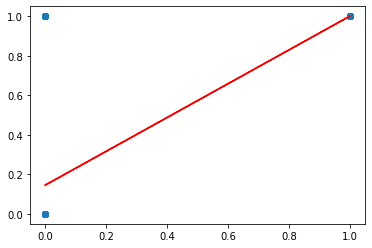

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.145798 + 0.854202*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [ ]:
# Print a summary of the linear regression model obtained
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     1739.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          4.14e-304
Time:                        05:09:47   Log-Likelihood:                -1056.3
No. Observations:                3212   AIC:                             2117.
Df Residuals:                    3210   BIC:                             2129.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1458      0.006     23.407      0.0

The R-squared value obtained is `0.351`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `x14`.


In [ ]:
# Assign all the feature variables to X
X_train_lm = X_train[['t', 'x14']]


In [ ]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.100788
t        0.758408
x14      0.319228
dtype: float64

In [ ]:
# Check the summary
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1205.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        05:12:49   Log-Likelihood:                -851.64
No. Observations:                3212   AIC:                             1709.
Df Residuals:                    3209   BIC:                             1728.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1008      0.006     16.178      0.0


We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.429` from `0.35`.
Let's go ahead and add another variable, `x15`.

In [ ]:
# Assign all the feature variables to X
X_train_lm = X_train[['t', 'x14','x15']]


In [ ]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     806.4
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        05:14:53   Log-Likelihood:                -849.04
No. Observations:                3212   AIC:                             1706.
Df Residuals:                    3208   BIC:                             1730.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0988      0.006     15.717      0.0

As The R squared value is still increased. So, the same process is being repeated till the highest value of R squared is attained.

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. 
It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,x9,6694.34
9,x10,1902.74
0,x1,1548.25
6,x7,40.10
15,x16,35.41
10,x11,34.14
1,x2,32.38
7,x8,19.15
11,x12,19.06
12,x13,15.10


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

As you can see from the summary and the VIF dataframe, some variables are still insignificant.  these variables are those which have a very high p-value. Let's go ahead and drop this variables
